In [4]:
import nltk
import pandas as pd
import nltk.data
import seaborn as sns
from sentence_splitter import SentenceSplitter
!pip install sentence-splitter
nltk.download('stopwords')
nltk.download('punkt')
import gensim.downloader as api
import en_core_web_sm

In [113]:


tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("/content/Little_Red_Cap_ Jacob_and_Wilhelm_Grimm.txt")
data = fp.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
splitter = SentenceSplitter(language='en')
sentences = splitter.split(text=data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [188]:
df = pd.DataFrame()

In [189]:
l = []
for i in sentences:
    if i == "":
        pass
    else:
        l.append(i)
df['sentences'] = l

In [190]:
df

,sentences
0,Little Red Cap
1,Jacob and Wilhelm Grimm
2,Once upon a time there was a sweet little girl.
3,"Everyone who saw her liked her, but most of al..."
4,Once she gave her a little cap made of red vel...
...,...
98,"Little Red Cap carried water until the large, ..."
99,The smell of sausage arose into the wolf's nose.
100,"He sniffed and looked down, stretching his nec..."
101,"He slid off the roof, fell into the trough, an..."


In [198]:
df['task'] = df.apply(lambda x: np.nan if len(x['sentences'].split())<8 else np.random.choice(['select_word', 'missing_word', 'select_sent']), axis=1)

In [199]:
df

,sentences,task
0,Little Red Cap,NaN
1,Jacob and Wilhelm Grimm,NaN
2,Once upon a time there was a sweet little girl.,select_sent
3,"Everyone who saw her liked her, but most of al...",missing_word
4,Once she gave her a little cap made of red vel...,select_word
...,...,...
98,"Little Red Cap carried water until the large, ...",select_word
99,The smell of sausage arose into the wolf's nose.,select_sent
100,"He sniffed and looked down, stretching his nec...",select_word
101,"He slid off the roof, fell into the trough, an...",missing_word


<Axes: xlabel='task', ylabel='Count'>

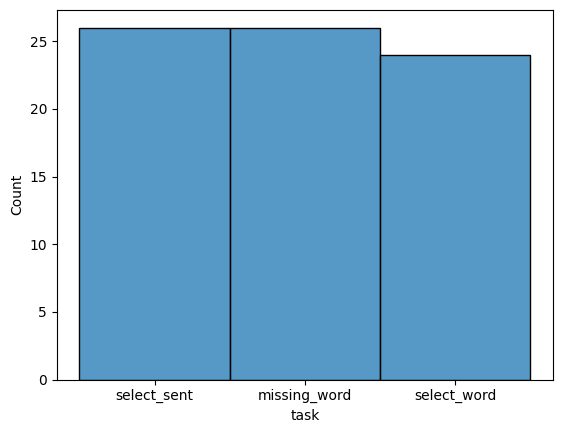

In [200]:
sns.histplot(df['task'])

In [216]:
nlp = en_core_web_sm.load()

In [230]:
for token in nlp(df.loc[3, 'sentences']):
    if token.pos_=='VERB':
        print(token.text)

saw
liked
know
give


In [236]:
filtered_words = [word for word in df.loc[3, 'sentences'].split() if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [455]:
def obj(row):
    z = []
    if (row['task'] == 'select_word' or  row['task'] =='missing_word'):
        for token in nlp(row['sentences']):
            if token.pos_ in ['VERB', 'ADJ']:
                z.append(str(token).lower())
                return np.random.choice(z)
    else:
        pass

In [433]:
z = []
for token in nlp('Once upon a time there was a sweet little girl'):
            if token.pos_ in ['VERB', 'ADV', 'ADJ']:
                z.append(token)

In [449]:
z

[Once, was, sweet, little]

In [456]:
df['word'] = df.apply(obj, axis=1)

In [457]:
df

,sentences,task,word,options
0,Little Red Cap,NaN,None,None
1,Jacob and Wilhelm Grimm,NaN,None,None
2,Once upon a time there was a sweet little girl.,select_sent,None,None
3,"Everyone who saw her liked her, but most of al...",missing_word,saw,None
4,Once she gave her a little cap made of red vel...,select_word,gave,"[velveteen, velvet, satin]"
...,...,...,...,...
98,"Little Red Cap carried water until the large, ...",select_word,little,"[crystal_clear, clear, clearer]"
99,The smell of sausage arose into the wolf's nose.,select_sent,None,None
100,"He sniffed and looked down, stretching his nec...",select_word,sniffed,"[shorter, longer]"
101,"He slid off the roof, fell into the trough, an...",missing_word,slid,None


In [392]:
model_g = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [491]:
def opt(row):
    a = set()
    if row['task'] == 'select_word':
        a.add(row['word'])
        for i in model_g.similar_by_word(row['word'], topn=2):
            a.add(i[0].lower())
        return list(a)
    else:
        row['word']


In [502]:
df['options'] = df.apply(opt, axis=1)
df['options'] = df.apply(lambda x: [] if x['task'] == 'missing_word' else x['options'], axis=1)

In [504]:
df

,sentences,task,word,options
0,Little Red Cap,NaN,None,None
1,Jacob and Wilhelm Grimm,NaN,None,None
2,Once upon a time there was a sweet little girl.,select_sent,None,None
3,"Everyone who saw her liked her, but most of al...",missing_word,saw,[]
4,Once she gave her a little cap made of red vel...,select_word,gave,"[give, gave, giving]"
...,...,...,...,...
98,"Little Red Cap carried water until the large, ...",select_word,little,"[little, bit, much]"
99,The smell of sausage arose into the wolf's nose.,select_sent,None,None
100,"He sniffed and looked down, stretching his nec...",select_word,sniffed,"[sniffing, sniff, sniffed]"
101,"He slid off the roof, fell into the trough, an...",missing_word,slid,[]
